![title](../images/logo_nao_digital.png)

# Tema 1: Elementos de Deep Learning
## 1. Objetivo

Familiarizarse con los conceptos de Deep Learning para plantear un modelo que permita crear un ChatBot de conversación en texto.

## Datos de la Medium Amira Rashid

Cómo se ha mencionado en el Anexo A, se ha provisto el archivo `conversations.json` que contiene los scripts de interacciones de usuarios y las respuestas que se espera que reciban, mismos que han sido provistos por el equipo de Amira a la empresa ChatBot Intelligence. 

Esencialmente se trata de una estructura que contiene una serie de scripts de conversación:
* **tag:** es una etiqueta que clasifica el tipo de interacción entre el usuario y el Chatbot (por ejemplo, “saludo”, “despedida”, etcétera),
* **patterns:** conversaciones de ejemplo que se espera recibir como consultar al chatbot por parte de los usuarios,
* **responses:** es una lista de las respuestas en texto que se espera que los usuarios reciban.




Este documento se desarrollarán scripts en Python que permitan plantear un primer modelo predictivo en el framework de Deep Learning para generar un ChatBot de conversación.

## 2. Librerias de trabajo

In [78]:
# Instala libreria Pandas si no la tenemos
#!pip install numpy tensorflow pandas matplotlib seaborn wordcloud scikit-learn

**Instalación de Spacy**

Spacy provee en su documentación las instrucciones para instalar su librería: https://spacy.io/usage

In [79]:
#pip install -U pip setuptools wheel
#pip install -U spacy
#python -m spacy download en_core_web_sm
#python -m spacy download es_core_news_sm

In [80]:
import os
import numpy as np
import spacy
import pandas as pd
import seaborn as sns
import json
import random
import pickle

import warnings
warnings.filterwarnings('ignore')

## 3. Elementos de Deep Learning

El Aprendizaje Profundo (Deep Learning) es una rama de la inteligencia artificial que se enfoca en entrenar modelos inspirados en redes neuronales del cerebro y que han cobrado gran relevancia en las últimas décadas al aprender a realizar tareas complejas como la visión por computadora y el procesamiento del lenguaje natural.

En esta sección se abordarán elementos básicos de Deep Learnign que permitiran plantear modelos predictivaos para la construcción de un Chatbot.

### 3.1 Modelos de redes neuronales

Primero comencemos recordando que en los modelos de regresión lineal, la idea esencial que para el conjunto de características del fenómeno $X = (x_1, \ldots, x_n)$ y la variable  objetivo $Y$ que queremos predecir existe una colección de números reales $W= (w_1, \ldots, w_n)$ y un sesgo $b \in \mathbb{R}$ de forma que podemos aproximar

$$Y \approx w_1 \cdot x_1 + \ldots + w_n \cdot x_n + b $$

De hecho, en los modelos de regresión generalizados, como la regresión logística, se asume la existena de una función $\mu$ especial (biyectiva, no lineal y generalmente suave) tal que:

$$Y \approx \mu^{-1}(w_1 \cdot x_1 + \ldots + w_n \cdot x_n + b) $$

La idea en estos casos es que si bien $Y$ puede ser un fenómeno complejo y no lineal, la forma funcional (pesos calibrados de alguna forma más un sesgo) de una regresión y el efecto de una función no lineal adecuada puede ayudar a explicar y predecir el fenómeno aproximadamente bien.

### 3.1.1 Perceptrón

De hecho, el modelo más básico de redes neuronales, llamado **Perceptrón**, es una generalización de las ideas recién descritas, pues en él nuevamente contamos con un conjunto de datos con características numéricas $X = (x_1, \ldots, x_n)$ y una variable objetivo $Y$, en que el modelo aproxima al objetivo con ciertos pesos $(w_1, \ldots, w_n)$ y un sesgo $b$, y la predicción final se obtiene aplicando una función de activación como en la ecuación siguente:

$$Y \approx activation(w_1 \cdot x_1 + \ldots + w_n \cdot x_n + b) $$


![title](../images/perceptron.png)

Claramente como en cualquier problema de aprendizaje supervisado, necesitamos definir como medir el error y como encontrar el valor adecuado de los parámetros involucrados, es decir, es necesario:

* Una colección de datos con características $X_1, \ldots X_n$ y una varible objetivo $Y$ a predecirse,
* El modelo que es una función  $f$ que aproxima el valor de $Y$ a partir de las características  $X_1, \ldots X_n$, definida con un conjunto de parámetros $\Theta:= (w_1, \ldots, w_n,b)$. Es decir:
  * $f(X_1, \ldots X_n, \Theta) \approx Y$
* Una forma de medir el error entre la predicción del modelo, esta se conoce típicamente como función de pérdida y esencialmente es una representación matemática que nos permite saber cuanto dista la predicción del valor real de la etiqueta:

  $$ l(f(X_1, \ldots X_n, \Theta), Y) $$
* Alguna técnica algorítmica que permita ajustar los valores de los parámetros $\Theta$ hasta  encontra un valor donde se alcance el mínimo error posible, es decir, minimizar la función de pérdida 

$$ \min_{\Theta} l(f(X_1, \ldots X_n, \Theta), Y)  $$

### 3.1.2 Modelos más generales.

El poder de las redes neuronales es que son modelos muy flexibles  en el que se puede adaptar su estructura de funcionamiento para añaidr más unidades como el perceptrón dentro de su estructura de forma que permiten retroalimentar las estimaciones que el modelo realiza. Esto les permite:

* Conectar capas a una misma unidad de datos de entrada,
* Conectar multiples capas de perceptrones que se alimenten a su vez de capas anteriores,
* Recibir datos de entrada con diferentes estructuras numéricas, como valores escalares, vectores o arreglos matriciales, que los modelos clásicos de Aprendizaje de Máquina no pueden lograr pues únicamente se limitan a estructuras de tablas,
* Predecir datos de salida con diferentes estructuras numéricas, como valores escalares, vectores o arreglos matriciales, que nuevamene los modelos clásicos de Aprendizaje de Máquina no pueden.

El término de **aprendizaje profundo** para estos modelos hace referencia a las diversas capas de redes neuronales que se acumulan en su estrucrtura y el rendimiento mejora a medida que la red crece en profundidad. 

Éstas ventajas son parte de las fortalezas de los modelos que les permiten resolver problemas de gran complejidad. Particularmente en el caso de problemas de Procesamiento de Lenguaje Natural, se trata de predecir cadenas de texto, es decir, sequencias con un orden específico, por lo que los modelos de esta clase pueden asumir el reto sin problemas.

![title](../images/dl_layer.png)

### 3.1.3 ¿Cómo calibrar los pesos?

Retornando al ejemplo de esta discusión donde se abordó la analogía con los modelos de regresión, los coeficiente de una relación funcional del estilo
$$Y \approx w_1 \cdot x_1 + \ldots + w_n \cdot x_n + b $$

Se suelen estimar con ciertas hipótesis estadísticas y métodos numéricos. De entre éstos últimos métodos, destaca un algoritmo denominado **descenso de gradiente**, que en términos simple es un algoritmo recursivo para encontrar el valor de un conjunto de parámetros donde la función de pérdida miniza su valor y con ello permite encontrar los valores de un modelo en donde los parámetros generan menor error.

Su idea básicamente es tomar un punto de inicio y contruir un nuevo punto para evaluar si la función de pérdida tiene un valor más pequeño; la estrategia se base en calcular la derivada de la función (que en muchas dimensiones se conoce como gradiente), para encontrar la dirección y la magnitud del cambio más pronunciado en la función, es decir, donde la función debería tomar valores más pequeño y tomar un punto la dirección opuesta al gradiente. En otras palabras, si el gradiente es positivo, el algoritmo ajustará los parámetros en la dirección negativa para reducir la función de costo, y si el gradiente es negativo, el algoritmo ajustará los parámetros en la dirección positiva.

Este proceso se repite iterativamente hasta que se alcanza un mínimo de la función de pérdida, lo que significa que los parámetros del modelo están optimizados para producir las mejores predicciones posibles.

El tamaño del paso que se toma en cada iteración se conoce como la **tasa de aprendizaje**. Una tasa de aprendizaje alta puede hacer que el algoritmo converja rápidamente, pero puede ser propensa a saltar sobre el mínimo global, mientras que una tasa de aprendizaje baja puede hacer que el algoritmo converja lentamente, pero puede encontrar el mínimo global de manera más confiable.

Existe una versión de éste algoritmo que puede lidiar con grandes volumenes de datos sacrificando precisión en las estimaciones, conocido como **descenso de gradiente estocástico** ya que  actualiza los parámetros del modelo para cada ejemplo de entrenamiento individual y que también se puede adaptar para usar lotes de individuos para entrenar en lugar de todo el conjunto original de datos.

Ahora bien, dado que normalmente los modelos de Deep Learning tienen expresiones complejas, el cálculo del gradiente puede tener una expresión compleja (básicamente es la regla de la cadena para funciones de dimensiones altas), los algoritmos numéricos de optimización emplean el proceso llamado **Propagación hacia atrás** (Back propagation, por sus siglas en inglés), donde se ajustas cada uno los valores de pesos de las conexiones entre las neuronas de la red neuronal para minimizar el error en la salida de la red.

El proceso de backpropagation implica calcular el gradiente de la función de error con respecto a los pesos de las conexiones en la red neuronal, y luego ajustar los pesos en la dirección opuesta al gradiente para minimizar el error. Este proceso se repite iterativamente para cada ejemplo en el conjunto de entrenamiento hasta que se alcanza un punto de convergencia. Aquí cobra relevancia el concepto de **época**, que se refiere a la cantidad de iteraciones completas que se hacen para ajustar los pesos considerando a todos los individuos del conjunto de entrenamiento. La teoria dice que aumentar la cantidad de épocas puede mejorar el ajuste del modelo, pero un número grande puede llevar a sobre entrenamiento.

### 3.1.4 Tipos de capas en modelos de aprendizaje profundo

En el contexto de redes se usa cierta terminología para referirse a las capas de una red:

* **Capa Densa:** es un tipo de capa de una red neuronal donde cada neurona de una capa está conectada a todas las neuronas de la capa siguiente, tambiñen se llama capa totalmente conectada,
* **Capa Droput:** se refiere a una capa que responde a una técnica de regularización, donde se desactivan aleatoriamente algunas neuronas (ude una capa durante el entrenamiento del modelo. La idea detrás de esta técnica es prevenir el sobreajuste (overfitting) del modelo al reducir la dependencia entre las neuronas y evitar que el modelo memorice el conjunto de datos de entrenamiento en lugar de generalizar a nuevos datos.

### 3.1.5 Otros puntos a considerar

Hay otros puntos relevantes a mencionar:

* Al sumar muchas capaz a la estructura de un modelo de aprendizaje profundo la cantidad de parámetros crecen muy rápido,
* En consecuencia, pueden necesitan una cantidad muy amplia de datos para entrenarse,
* Al ser tan flexibles, pueden sufrir sobre ajuste,
* La arquitectura de una red que sirve para resolver un problema específico no es conocida de entrada, se necesita experimentar y combinar ingeniería de características para garantizar el éxito de un modelo, así como contar con un volumen de datos adecuado junto con suficiente poder predictivo,
* Existe diferentes funciones de activación que se han probado con éxito en distintos contextos, entre ellas destacan las funciones *sigmoide*, *softmax*, *ReLU* y otras relacionada con funciones trigonométricas hiperbólicas (ver https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253),
* Como en cualquier problema de aprendizaje, un parte importante es definir adecuadamente la función de pérdida para resolver el problema.

## 4. Usando TensorFlow y Keras

TensorFlow es una biblioteca de software, creada por Google, que permite a los desarrolladores construir modelos de redes neuronales y otros modelos de aprendizaje automático, con una sintaxis fácil de entender y que facilita el proceso de entrenamiento y puesta en producción de un modelo. Por su parte, Keras es una interfaz de programación de aplicaciones (API) que permite a los desarrolladores crear y entrenar modelos de aprendizaje profundo , a través de la abstracción códifo de nivel superior que facilita la construcción de tales modelos.

Existen otros frameworks de entrenamiento de modelos de Deep Learning, como PyTorch (https://pytorch.org), que basan su sintaxis en programación orientada a objectos, lo que puede implicar un nivel de complejidad más alto para implementar modelos de redes neuronales.

A continuación veremos algunos ejemplos de código sobre como entrenar modelos de aprendizaje profundo usando ambas herramientas



## 4.1 Ejemplo: Entrenando una red neuronal sobre el conjunto de datos Iris

El conjunto de datos de flores Iris es un conjunto de datos famoso que contiene información sobre tres diferentes especies de flores de iris: Setosa, Versicolor y Virginica.

Cada muestra en el conjunto de datos representa una flor de iris, y hay un total de 150 muestras. Cada muestra tiene cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

Entrenaremos una red neuronal para predecir el tipo de flor con base en sus características físicas.

**Importa librerías relevantes**

In [81]:
# import pyplot
from matplotlib import pyplot as plt

# Dummy Data from sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# tensorflow 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**Cargamos el conjunto de datos**

Usamos la función `load_iris` de Sklearn

In [82]:
# Carga el conjunto de datos iris
iris = load_iris()

In [83]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Estos valores corresponden a las columnas `sepal width (cm)`, `petal length (cm)` y `petal width (cm)`:

In [84]:
pd.DataFrame(iris.data, columns=iris['feature_names']).sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
101,5.8,2.7,5.1,1.9
38,4.4,3.0,1.3,0.2
70,5.9,3.2,4.8,1.8
136,6.3,3.4,5.6,2.4
145,6.7,3.0,5.2,2.3
24,4.8,3.4,1.9,0.2
86,6.7,3.1,4.7,1.5
18,5.7,3.8,1.7,0.3
129,7.2,3.0,5.8,1.6
80,5.5,2.4,3.8,1.1


También tenemos el tipo de flor al que corresponden (`Versicolor = 0`, `Virginia=1`, `Setosa = 2`)

In [85]:
pd.DataFrame(iris.target, columns=['type']).sample(10)

,type
82,1
51,1
107,2
91,1
131,2
129,2
111,2
2,0
99,1
34,0


**Separamos los datos en conjuntos de entrenamiento en prueba**

In [86]:
# Divide el conjunto de datos en conjuntos de train y testr
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234)

**Usamos el API de Keras para definir el modelo**

Keras permite una definición sencilla de modelo a través de su función `Sequential`, la cual acepta diferentes tipos de capas que van definiendo la arquitectura de la red.

En el ejemplo inferior tenemos que:
* La primera capa es de tipo denso con 10 unidades de perceptron y una función de activación sigmoide, teniendo como datos de entrada a vectores de tamaño 4 (por las 4 columnas del conjunto Iris).
* La segunda capas es del tipo denso pero reduce su tamaño a 10 unidades y emplea una función de activación `softmax`.

In [87]:
# Crea un modelo secuencial de TensorFlow
model = Sequential([
    Dense(10, activation='sigmoid', input_shape=(4,)),
    Dense(3, activation='softmax')
])

**Compilando del modelo**

Esta esta se refiere a la compilación del modelo recién creado en donde especificamos 1) la función de pérdida que queremos usar, 2) el tipo de optimizador (SGD, en nuestro caso) y 3) la métrica que se va a emplear para medir el performance del modelo (al ser un problema de clasificación, aquí se usa una métrica relevante como **accuracy**)

In [88]:
# Compila el modelo
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )

**Ajustando el modelo**

En esta etapa el modelo se ajusta con el método `.fit()` sobre los datos de entrenamiento, en este caso se espeficón un ajuste de 50 iteraciones sobre los datos de entrenamiento (es decir, 50 épocas), usando lotes de tamaño 5.

El parámetro `verbose=1` nos imprime la infomación de la función de pérdida y el error obtenido en la iteración:

In [89]:

# Entrena el modelo
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=5,
    verbose=1)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 1.4585 - accuracy: 0.3500
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 1.2083 - accuracy: 0.3500
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 1.1174 - accuracy: 0.3500
Epoch 4/50
24/24 [==============================] - 0s 944us/step - loss: 1.0809 - accuracy: 0.3500
Epoch 5/50
24/24 [==============================] - 0s 986us/step - loss: 1.0634 - accuracy: 0.3500
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0515 - accuracy: 0.3667
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0418 - accuracy: 0.6333
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0333 - accuracy: 0.6833
Epoch 9/50
24/24 [==============================] - 0s 971us/step - loss: 1.0263 - accuracy: 0.6917
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0179 - accuracy: 0.6917
Epoch 11/50
2

**Evaluando el performance del modelo**

Con el modelo ya entrenamos, podemos probar el performance con la métrica que especificamos:

In [90]:
# Evalúa el modelo con el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Imprime la precisión del modelo
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.5666666626930237


También podemos analizar como cambian estos valores a lo largo de lás épocas de entrenamiento:

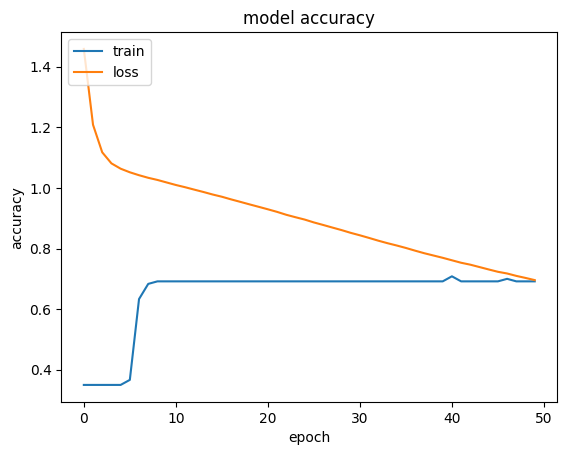

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

## 4.2 Un modelo de Deep Learning para generar un ChatBot 🤖

En esta sección abordaremos un técnica simple para generar modelos de conversación con ChatBot a través de aprendizaje de máquina. Antes de ello conviene traer a discusión el tipo de ChatBots que existen:

### 4.2.1 Tipos de ChatBot Conversacionales

La creación de ChatBots de conversación tiene una historia larga y esencialmente obecede al problema que se pretende resolver y las limitaciones tecnológicas existentes. En términos muy generales, podemos decir que se dividen en varios tipos:

* **Basados en árboles de decisión:** En términos simples, tratan de guiar al usuario con siguiendo un flujo de información que genera respuestas, de forma que el usuario provee datos a un bot (usualmente a través de una interfaz que le permite seleccionar en un menú gráfico) y como resultado el flujo genera un texto predeterminado; requiere la planificación del flujo basándose en un árbol de decisión. Ver por ejemplo: https://www.dashly.io/custom-chatbot/glossary/decision-trees/


* **Basado en reconocimiento de palabras clave**: se refiere a una situación donde el bot procesa el texto con técnicas de NLP, reconociendo  palabras clave en los mensajes de los usuarios para determinar su intención y proporcionar una respuesta adecuada. Por ejemplo, si un usuario escribe "¿Cuál es el horario de atención?", el chatbot puede reconocer las palabras clave "horario" y "atención" y responder con la información correspondiente.

    Este tipo de chatbot utiliza algoritmos de procesamiento del lenguaje natural para analizar el texto del usuario y determinar las palabras clave relevantes, luego busca en su base de datos de respuestas para proporcionar una respuesta adecuada.

* **Basado en modelos contextuales:** usualmente basando en técnicas de NLP y modelos de aprendizaje automático, se refiere a un escenario donde un chatbot puede recordar la información de la conversación anterior y usarla para guiar la conversación actual. Por ejemplo, si alguien está preguntando acerca de un producto en particular, el chatbot puede recordar lo que se discutió previamente sobre el producto y proporcionar información adicional basada en ese contexto. 

* **Basados en modelos de generación de lenguaje natural:** Esencialmente usan modelos pueden generar texto automáticamente, como respuestas a preguntas, resúmenes, historias, entre otros. En su mayoría se basan en frameworks predictivos de aprendizaje automático en combinación con algun forma de evaluación y refuerzo de que el contenido que generan es adecuado para las preguntas que les hacen llegar los usuarios (dentro de estos se encuentra ChatGPT).

En términos prácticos, la idoneidad de cada tipo de ChatBot depende el problema a resolver y en la práctica es común ver enfoques que híbridos, es decir, que mezclan las técnicas de construcción de bots señaladas arriba.

### 4.2.2 Entrenando un modelo de Deep Learning para generar un ChatBot de reconocimiento de palabras clave 🤖

Una forma sencilla para crear un modelo conversacional es general un modelo de reconocimiento de palabras clave, que una vez reconocidas, puedan ser atendidas acudiendo a una base de datos de respuestas.

Desde el punto de vista de aprendizaje de máquina esto se puede pensar como un problema de aprendizaje supervizado de tipo clasificación, en el siguiente sentido:

a. Los valores de entrada es la representación numérica de la pregunta del usuario, donde se han codificado los términos clave.

b. La variable objetivo no es más que una categoría del tipo de pregunta al que pertenece dicha pregunta.

La respuesta a dicha pregunta simplemente se puede contestar una vez que se ha predicho a que categoríua pertenece y mostrando al usuario la respuesta alojada en la correspondiente base de datos de respuestas.

En resumen, esto propone un flujo de trabajo para construir un Chatbot:

* Procesar un conjunto de documentos para limpiar el texto correspondiete,
* Crear una representación numérica de los documentos limpios, incluyen los términos clave,
* Entrenar un modelo usando la representación numérica, donde la variable objetivo en la categoría a la que pertenece la pregunta
* Una vez entrenado el modelo, se puede generar una respuesta a una nueva pregunta usando el modelo previamente entrenado, asignado el texto a cualquiera de las respuestas presentes en la base de datos para dicha categoría de pregunta que el modelo predijo.

Vamos a ejemplificar lo anterior, usando el conjunto de datos **sample.json**.

### 4.2.2.1 Conjunto de datos sample.json

Este conjunto de datos se trata de una estructura que contiene una serie de scripts de conversación:
* **tag:** es una etiqueta que clasifica el tipo de interacción entre el usuario y el Chatbot (por ejemplo, “saludo”, “despedida”, etcétera),
* **patterns:** conversaciones de ejemplo que se espera recibir como consultar al chatbot por parte de los usuarios,
* **responses:** es una lista de las respuestas en texto que se espera que los usuarios reciban.

In [92]:
with open('../data/sample.json') as f:
    conversations = json.load(f)

In [93]:
# Imprimimos el contenido
from pprint import pprint

pprint(conversations)

[{'patterns': ['Hola', 'holaa', 'oliiii', 'hello', 'hi'],
  'responses': ['Hola :)', 'Hola crayola ;)', 'Hola! Encantado de verte'],
  'tag': 'saludo'},
 {'patterns': ['como te llamas',
               'cual es tu nombre',
               'quien eres',
               'quien eres tu'],
  'responses': ['Mi nombre es ChatBot, soy un bot de conversación :)',
                'Soy ChatBot, soy un bot de conversación :)',
                'Me llamo ChatBot, soy un bot entrenandose para conversar'],
  'tag': 'introduccion'},
 {'patterns': ['que es un bot', 'que es un bot de conversacion'],
  'responses': ['Soy un sistema automatizado que usa inteligencia articifial!',
                'Es un robot con inteligencia articifial que quiere conversar'],
  'tag': 'explicacion'},
 {'patterns': ['Adios', 'bye', 'ciao', 'nos vemos'],
  'responses': ['Adios!', 'Bye, Bye', 'Vuelve pronto'],
  'tag': 'despedida'}]


En este caso:

* Los documentos que contienen las preguntas con las que predeciremos corresponden al campo `patterns`,
* La categoría a predecir es el contenido del campo `tag`
* Mientras que las respuestas que puede recibir el usuario se encuentran en el campo `responses`

Como un paso auxiliar creamos un diccionario con las respuestas del bot por categoria y lo salvamos:

In [94]:
# Crea un diccionario con las respuestas del 
# bot por categoria y lo salvamos
category_answers= {}

for conversation in conversations:
    cat = conversation['tag']
    category_answers[cat] = conversation['responses']


pickle.dump(category_answers, open('category_answers.pkl', 'wb'))

In [132]:
category_answers

{'saludo': ['Hola :)', 'Hola crayola ;)', 'Hola! Encantado de verte'],
 'introduccion': ['Mi nombre es ChatBot, soy un bot de conversación :)',
  'Soy ChatBot, soy un bot de conversación :)',
  'Me llamo ChatBot, soy un bot entrenandose para conversar'],
 'explicacion': ['Soy un sistema automatizado que usa inteligencia articifial!',
  'Es un robot con inteligencia articifial que quiere conversar'],
 'despedida': ['Adios!', 'Bye, Bye', 'Vuelve pronto']}

### 4.2.2.2 Procesamiento de documentos de preguntas

Para procesar las preguntas realizaremos la eliminación de signos de puntuación, se convertiran a minúsculas y el texto será lematizado, de manera que podamos identificar la información clave presente en cada una.

Esto se puede lograr con spaCy:


In [96]:
# Cargamos el modelo de lenguaje en español de Spacy
nlp = spacy.load('es_core_news_sm')

In [97]:
import itertools

# lista para extraer preguntas
questions = []

for script in conversations:

    # extraemos preguntas
    question = script['patterns']
    questions.append(question)

# Consolida todas las preguntas 
documents = list(itertools.chain.from_iterable(questions))

In [98]:
pd.DataFrame(conversations).explode(['patterns'])

,tag,patterns,responses
0,saludo,Hola,"[Hola :), Hola crayola ;), Hola! Encantado de ..."
0,saludo,holaa,"[Hola :), Hola crayola ;), Hola! Encantado de ..."
0,saludo,oliiii,"[Hola :), Hola crayola ;), Hola! Encantado de ..."
0,saludo,hello,"[Hola :), Hola crayola ;), Hola! Encantado de ..."
0,saludo,hi,"[Hola :), Hola crayola ;), Hola! Encantado de ..."
1,introduccion,como te llamas,"[Mi nombre es ChatBot, soy un bot de conversac..."
1,introduccion,cual es tu nombre,"[Mi nombre es ChatBot, soy un bot de conversac..."
1,introduccion,quien eres,"[Mi nombre es ChatBot, soy un bot de conversac..."
1,introduccion,quien eres tu,"[Mi nombre es ChatBot, soy un bot de conversac..."
2,explicacion,que es un bot,[Soy un sistema automatizado que usa inteligen...


In [99]:
documents

['Hola',
 'holaa',
 'oliiii',
 'hello',
 'hi',
 'como te llamas',
 'cual es tu nombre',
 'quien eres',
 'quien eres tu',
 'que es un bot',
 'que es un bot de conversacion',
 'Adios',
 'bye',
 'ciao',
 'nos vemos']

Ahora limpiaremos los signos de puntuación y lematizamos:

In [100]:
question_processed = []

for doc in documents:
    tokens = nlp(doc)
    # remueve signos de puntuacion y lematiza
    new_tokens = [t.orth_ for t in tokens if not  t.is_punct]

    # pasa a minusculas
    new_tokens = [t.lower() for t in new_tokens]

    # une los tokens procesados en una string con espacios
    question_processed.append(' '.join(new_tokens))


Estos son las preguntas ya preocesadas:

In [101]:
question_processed

['hola',
 'holaa',
 'oliiii',
 'hello',
 'hi',
 'como te llamas',
 'cual es tu nombre',
 'quien eres',
 'quien eres tu',
 'que es un bot',
 'que es un bot de conversacion',
 'adios',
 'bye',
 'ciao',
 'nos vemos']

Como un paso auxilar, también extraremos las categorias que se asocian a cada una de estas preguntas, usando pandas y la funcionalidad `explode`:

In [102]:
# Lee el archivo de script de conversaciones
# y lo extiende por el contenido de patterns
df_conversation = pd.DataFrame(conversations).explode(
    ['patterns']
    ).reset_index(drop=True)


In [103]:
df_conversation[['patterns', 'tag']]

,patterns,tag
0,Hola,saludo
1,holaa,saludo
2,oliiii,saludo
3,hello,saludo
4,hi,saludo
5,como te llamas,introduccion
6,cual es tu nombre,introduccion
7,quien eres,introduccion
8,quien eres tu,introduccion
9,que es un bot,explicacion


En este dataframe, notamos que la columna `tag` tiene la información de que queremos.

### 4.2.2.3 Representación numérica de documentos de preguntas

Crearemos una bolsa de palabras de los términos presentes en los documentos que recientemene limpiamos, usando `CountVectorizer` de Sklearn:

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
# instancia el transformador
vectorizer = CountVectorizer()

# crea la bolsa de palabras con la lista de documentos
X = vectorizer.fit_transform(question_processed)

bow = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
    )

Para reutilizarlo posteriormente, salvaremos en formato pickle al transformador `CountVectorizer` que hemos ajustado recientemente:

In [105]:
# Salva el transformador que crea la bolsa de palabras
# con el texto limpio de las preguntas
pickle.dump(
    vectorizer,
    open('sample_vectorizer_bow.pkl', 'wb')
    )

El resultado lo podemos visualizar en la tabla inferior:

In [106]:
# Toma una muestra de 10 renglones de la bolsa de palabras:
bow.sample(10)

,adios,bot,bye,ciao,como,conversacion,cual,de,eres,es,...,llamas,nombre,nos,oliiii,que,quien,te,tu,un,vemos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


Para facilitar nuestro análisis, ahora podemo fusionar tanto la bolsa de palabras junto con las categorias que vamos a predecir:

In [107]:
# Une la bolsa de palabras de cada pregunta con su categoria
processed_data = pd.concat(
    [bow,
     df_conversation[['tag']]
     ], axis=1)

In [108]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   adios         15 non-null     int64 
 1   bot           15 non-null     int64 
 2   bye           15 non-null     int64 
 3   ciao          15 non-null     int64 
 4   como          15 non-null     int64 
 5   conversacion  15 non-null     int64 
 6   cual          15 non-null     int64 
 7   de            15 non-null     int64 
 8   eres          15 non-null     int64 
 9   es            15 non-null     int64 
 10  hello         15 non-null     int64 
 11  hi            15 non-null     int64 
 12  hola          15 non-null     int64 
 13  holaa         15 non-null     int64 
 14  llamas        15 non-null     int64 
 15  nombre        15 non-null     int64 
 16  nos           15 non-null     int64 
 17  oliiii        15 non-null     int64 
 18  que           15 non-null     int64 
 19  quien     

Como un paso adicional reordenaremos el dataframe obtenido:

In [109]:
# Ordena aleatoriamente el dataframe:
processed_data = processed_data.sample(
    frac=1,
    random_state=123
).reset_index(drop=True)

#del processed_data['index']

**One Hot Encoding de categorías**

Como sabemos, para emplear variables categóricas en  modelos de aprendizaje automático necesitamos realizar la codificación de tales categorías.

La estrategia que se puede emplear es el One Hot Encoding, que consiste en representar categorías a través de columnas que indican con 0 y 1, si una categoría está presente. La idea es que esta codificación, de una categoría a un vector de tantas dimensiones como categorías existas, sea el output que va a predecir la red neuronal.

En pandas, es facil obtener la representación señalada con el método `get_dummies`:

In [110]:
pd.get_dummies(processed_data['tag'], dtype=int)

,despedida,explicacion,introduccion,saludo
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,0,0,1
9,0,0,0,1


Para recordar en el orden en que se están codificando las variables, podemos guardar la lista de los encabezados de dicha tabla:

In [111]:
sample_categories = list(pd.get_dummies(processed_data['tag']).columns)


Nuevamente, para reutilizar posteriormente dicha información, salvaremos la variable `sample_categories` en formato pickle.

In [112]:
pickle.dump(
    sample_categories,
    open('sample_categories.pkl', 'wb')
    )

### 4.2.2.4 Entrenamiento del Modelo

Ahora entrenaremos un modelo con Tensorflow, tomando como características al dataframe que tiene la información de la bolsa de palabras y como variable objetivo a la representación en One Hot Encoding de cada categoria asociada a las preguntas:

In [113]:
# Dimension de datos de entrada (nube de palabras)
dim_x = len(processed_data._get_numeric_data().to_numpy()[0])

# dimension de la representacion One Hot Encoding
dim_y = len(pd.get_dummies(processed_data['tag'], dtype=int).to_numpy()[0])


Creamos un modelo en Tensorflow con estas características:

In [114]:
model = Sequential([
    Dense(25, input_shape=(dim_x,), activation='relu'),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dropout(0.2),
    Dense(dim_y, activation='softmax')
]
)

Ahora compilamos el modelo espeficando su función de pérdida, optimizador y métrica para medir su performance:

In [115]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )

Entreamos el modelo:

In [116]:
# Bolsa de palabras como arreglo de numpy
X_train = processed_data._get_numeric_data().to_numpy()

# Representación en One Hot Encoding de las categorias
y_train = pd.get_dummies(processed_data['tag'], dtype=float).to_numpy()

In [117]:
hist = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=100,
    verbose=1
    )

Epoch 1/500
1/1 [==============================] - 0s 419ms/step - loss: 1.4498 - accuracy: 0.2667
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 1.4700 - accuracy: 0.0667
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4334 - accuracy: 0.2000
Epoch 4/500
1/1 [==============================] - 0s 77ms/step - loss: 1.4759 - accuracy: 0.2000
Epoch 5/500
1/1 [==============================] - 0s 30ms/step - loss: 1.4138 - accuracy: 0.4000
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 1.4300 - accuracy: 0.2000
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 1.4125 - accuracy: 0.4667
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4439 - accuracy: 0.1333
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4272 - accuracy: 0.2000
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 1.4159 - accuracy: 0.1333
Epoch 11/500
1/1 [=======

In [118]:
pickle.dump(
    model,
    open('sample_model.pkl', 'wb')
    )

### 4.2.2.5 Prediciendo la respuesta para un nuevo mensaje

Supongamos ahora que queremos obtener la respuesta para el nuevo mensaje *"este, como te llamas?"*.

El proceso que debemos seguir es exactamente el mismo, limpiar el texto, crear la representación numérica del mensaje, tal como se uso en el entrenamiento del modelo, aplicar el modelo a dicha representación.


In [119]:
new_message = "este?, ¿como te llamas!"

In [120]:
def text_pre_process(message: str):
    """
    Procesa el texto del nuevo mensaje
    """
    # Procesa el mensaje con spaCy
    tokens = nlp(message)
    # remueve signos de puntuacion y lematiza
    new_tokens = [t.orth_ for t in tokens if not  t.is_punct]

    # pasa a minusculas
    new_tokens = [t.lower() for t in new_tokens]

    # une los tokens procesados con un espacio
    clean_message = ' '.join(new_tokens)
    
    return clean_message

In [121]:
text_pre_process(new_message)

'este como te llamas'

In [122]:
def bow_representation(message: str)-> np.array:
    """
    Obtiene la representacion del mensaje en su
    codificacion de la nube de palabras
    """
    bow_message = vectorizer.transform(
        [message]
        ).toarray()

    return bow_message

Con estas funciones podemos representar numericamente el texto limpio:

In [123]:
# representacion del texto en la bolsa de palabras
bow_representation(text_pre_process(new_message))

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0]])

Ahora podemos obtener la predicción. En este punto tenemos que mencionar que el modelo regresará un vector numérico de dimensión cuatro. Aquí, como regla de dedo, se asociará el mensaje con el score más alto que tenga dichas entradas, como un proxi de que el contenido del mensaje es más afin a dicha categoria de respuesta:

In [124]:
model(bow_representation(text_pre_process(new_message))).numpy()

array([[0.07190792, 0.02794844, 0.7023362 , 0.19780739]], dtype=float32)

Como sabemos la entradas se encuentran codificadas con respecto al orden de la lista `sample_categories`:

In [125]:
sample_categories

['despedida', 'explicacion', 'introduccion', 'saludo']

Finalmente, a partir de tal categoría podemos asociar una respuesta al mensaje, que es la tarea que debe ejecutar el ChatBot conversacional:

In [126]:
def get_prediction(
        bow_message: np.array
        )-> int:
    """
    Obtiene la prediccion de la categoria
    que corresponde al mensaje
    """

    # Calcula el indice entero al que corresponde la catforia
    prediction = model(bow_message).numpy()

    # Obtiene el indice de la entrada con probabilidad mayor
    index = np.argmax(prediction)

    predicted_category = sample_categories[index] 

    return predicted_category

In [127]:
get_prediction(
    bow_representation(
        text_pre_process(new_message)
        )
        )


'introduccion'

In [128]:
sample_categories

['despedida', 'explicacion', 'introduccion', 'saludo']

In [129]:
def get_answer(category: str)-> str:
    """
    Obtiene el mensaje de respuesta para una categoria
    """
    # Obtiene las respuestas de la categoria
    answers = category_answers[category]

    # Selecciona una respuesta al azar
    ans = random.choice(answers)

    return ans

Este es el código que nos da la respuesta correspondiente:

In [130]:
bot_answer = get_answer(get_prediction(
    bow_representation(
        text_pre_process(new_message)
    )
))

En un bot de conversación, el usuario vería lo siguiente:

In [131]:
print("Usuario:", new_message)
print("ChatBot:", bot_answer)


Usuario: este?, ¿como te llamas!
ChatBot: Soy ChatBot, soy un bot de conversación :)


### 6. Entregables

A. Modifica el código presentado anteriormente para crear un script en Python (`conversations_train.py`) que entre un modelo de Deep Learning, con el propósito de obtener mensajes de respuesta a las conversaciones especificadas en el archivo **conversations.json** provisto por el equipo de Amira Rashid, **asegurándote de remover signos de puntuacios y stop words**.

Este modelo deberá tener como elemento de salida, archivos de los siguiente elementos:

    * Un diccionario donde las llaves son categorías de preguntas y los valores son las lista de respuestas que el equipo de la influencer espera que el ChatBot comunique a sus usuarios, denomiando `conversations_category_answers.json`,
    * El tranformador de Sklearn que permite transformar un mensaje en texto a la bolsa de palabras, mismo que deberá ser ajusta con el corpus de preguntas de los usuarios, que el equipo de Amira proporcinó. Este se deberá denominar `conversations_vectorizer_bow.pkl`
    * La versión pickle de la lista de nombres de categorías que asociadas a las preguntas planteadas por el equipo de la influencer, en el orden específico en que se haya realizado el One Hot Encoding para representarlas en el procesamiento del modelo. Este se deberá denominar `conversations_categories.pkl`.
    * El modelo entrenado para tal efecto, en versión pickle. Dicho archivo deberá denominarse `model_conversations_chatbot.pkl`

B. Adicionalmente, tras su ejecución el script deberá escribir a pantalla (estandar output, en consola), el mensaje que obtendría un usuario al escribir "Mi signo es Tauro", como resultado de emplear el modelo entrenado para predecir que mensaje asociarle.